# <font color=blue> Simple quantifications of experimental GFP gradients 
***

In [26]:
#import packages : 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import os
import sys 
import random


## Analysis of GFP gradients : 

> Import experimental data and extract for each curve a plateau value (obtained between 60 and 80 um) 
> and a length scale, which is the first value passing below half of the maximum.

In [27]:
##import experimental data  : 

dir='./Experimental_Data'

#import data from high affinity nanobody (VHH)  experiment
vhh=pd.read_csv(dir+'/hh-VHH-CD8.csv')
col = vhh.loc[: , "1":"11"]
vhh['signal_mean'] = col.mean(axis=1)
vhh['signal_std'] = col.std(axis=1)

#import data from high affinity nanobody + fat body trap experiment

fat_body=pd.read_csv(dir+'/20190712 ptc-sGFP hh-VHH-CD8, lpp>VHH-CD8.csv')
col = fat_body.loc[: , "1":"7"]
fat_body['signal_mean'] = col.mean(axis=1)
fat_body['signal_std'] = col.std(axis=1)


#import data from high affinity nanobody overexpression  experiment

vhh_gal4=pd.read_csv(dir+'/20190709 ptc-sG hhG4 UAS-VHH-CD8_copy_pandas.csv')
col = vhh_gal4.loc[: , "sample1":"sample8"]
vhh_gal4['signal_mean'] = col.mean(axis=1)
vhh_gal4['signal_std'] = col.std(axis=1)

#import data from low affinity nanobody experiment
lag3=pd.read_csv(dir+'/20190307 ptc-sG hh-LaG3-CD8.csv')
col = lag3.loc[: , "1":"10"]
lag3['signal_mean'] = col.mean(axis=1)
lag3['signal_std'] = col.std(axis=1)

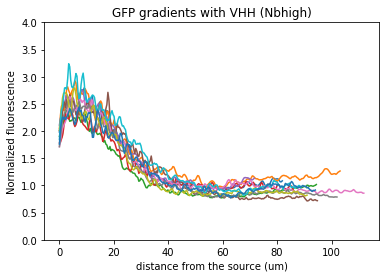

In [28]:
Ratio_vhh=[]
L_Half_vhh=[]
for col in vhh.columns[1:12]: 
    plt.plot(vhh['distance'], vhh[col])
    plt.ylim([0, 4])
    plt.xlabel('distance from the source (um)')
    plt.ylabel('Normalized fluorescence')
    plt.title('GFP gradients with VHH (Nbhigh)')
    # extract maximum value of the profile
    M=vhh[col].max()
    # extract the position of the maximum value of the profile
    XM=vhh[vhh[col]==M].distance.values[0] 
    # extract the position of the first value of the profile which passes below M/2
    #the second condition imposes that the position is after the maximum value
    Xhalf= vhh[(vhh[col]<M/2.0) & (vhh['distance']>XM)].distance.values[0]
    # extract the plateau value
    Plat=vhh[(vhh.distance>60)&(vhh.distance<80)][col].mean()
    #Ratio of plateau to maximum
    Ratio_vhh.append(Plat/M)
    L_Half_vhh.append(Xhalf)

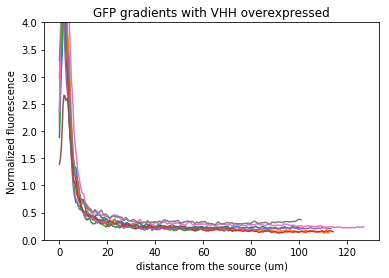

In [29]:
Ratio_vhh_gal4=[]
L_Half_vhh_gal4=[]
for col in vhh_gal4.columns[1:9]: 
    plt.plot(vhh_gal4['distance'],vhh_gal4[col])
    plt.ylim([0, 4])
    plt.xlabel('distance from the source (um)')
    plt.ylabel('Normalized fluorescence')
    plt.title('GFP gradients with VHH overexpressed')
    # extract maximum value of the profile
    M=vhh_gal4[col].max()
    # extract the position of the maximum value of the profile
    XM=vhh_gal4[vhh_gal4[col]==M].distance.values[0]
    # extract the position of the first value of the profile which passes below M/2
    #the second condition imposes that the position is after the maximum value
    Xhalf= vhh_gal4[(vhh_gal4[col]<M/2.0) & (vhh_gal4['distance']>XM)].distance.values[0]
    # extract the plateau value
    Plat=vhh_gal4[(vhh_gal4.distance>60)&(vhh_gal4.distance<80)][col].mean()
    #Ratio of plateau to maximum
    Ratio_vhh_gal4.append(Plat/M)
    L_Half_vhh_gal4.append(Xhalf)

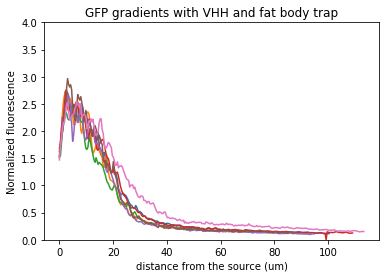

In [30]:
Ratio_fat_body=[]
L_Half_fat_body=[]
for col in fat_body.columns[1:8]: 
    plt.plot(fat_body['distance'],fat_body[col])
    plt.ylim([0, 4])
    plt.xlabel('distance from the source (um)')
    plt.ylabel('Normalized fluorescence')
    plt.title('GFP gradients with VHH and fat body trap')
    # extract maximum value of the profile
    M=fat_body[col].max()
    # extract the position of the maximum value of the profile
    XM=fat_body[fat_body[col]==M].distance.values[0]
    # extract the position of the first value of the profile which passes below M/2
    #the second condition imposes that the position is after the maximum value
    Xhalf= fat_body[(fat_body[col]<M/2.0) & (fat_body['distance']>XM)].distance.values[0]
    # extract the plateau value
    Plat=fat_body[(fat_body.distance>60)&(fat_body.distance<80)][col].mean()
    #Ratio of plateau to maximum
    Ratio_fat_body.append(Plat/M)
    L_Half_fat_body.append(Xhalf)

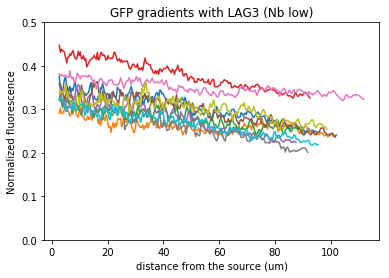

In [41]:
#for lag3 the profile is too flat to obtain the position at max/2
Ratio_lag3=[]
L_Half_lag3=[]
for col in lag3.columns[1:11]: 
    plt.ylim([0, 0.5])
    plt.plot(lag3['distance'][7:],lag3[col][7:]) # for lag3 the signal is less than the source signal
    plt.xlabel('distance from the source (um)')
    plt.ylabel('Normalized fluorescence')
    plt.title('GFP gradients with LAG3 (Nb low)')
    # extract maximum value of the profile
    M=lag3[col][7:].max()
    # extract the position of the maximum value of the profile
    XM=lag3[lag3[col]==M].distance.values[0]
    # extract the plateau value
    Plat=lag3[(lag3.distance>60)&(lag3.distance<80)][col].mean()
    #Ratio of plateau to maximum
    Ratio_lag3.append(Plat/M)

In [32]:
print('VHH :')
print('Half maximum position = ',np.mean(L_Half_vhh),' microns +- ',np.std(L_Half_vhh))
print('Ratio plateau/max = ',np.mean(Ratio_vhh),' +- ',np.std(Ratio_vhh))

print('VHH + fat body trap :')
print('Half maximum position = ',np.mean(L_Half_fat_body),' microns +- ',np.std(L_Half_fat_body))
print('Ratio plateau/max = ',np.mean(Ratio_fat_body),' +- ',np.std(Ratio_fat_body))

print('VHH GAL4 :')
print('Half maximum position = ',np.mean(L_Half_vhh_gal4),' microns +- ',np.std(L_Half_vhh_gal4))
print('Ratio plateau/max = ',np.mean(Ratio_vhh_gal4),' +- ',np.std(Ratio_vhh_gal4))

print('LAG3:')
print('Ratio plateau/max = ',np.mean(Ratio_lag3),' +- ',np.std(Ratio_lag3))

VHH :
('Half maximum position = ', 30.056999999999995, ' microns +- ', 2.045598689870523)
('Ratio plateau/max = ', 0.35022260209480705, ' +- ', 0.03960228132751122)
VHH + fat body trap :
('Half maximum position = ', 18.253714285714288, ' microns +- ', 2.4524475654383484)
('Ratio plateau/max = ', 0.06380816844471571, ' +- ', 0.016086411159149626)
VHH GAL4 :
('Half maximum position = ', 4.7395, ' microns +- ', 0.6285003977723483)
('Ratio plateau/max = ', 0.04815840401482653, ' +- ', 0.015529390007926976)
LAG3:
('Ratio plateau/max = ', 0.7722656954376405, ' +- ', 0.05804791256676732)


## Analysis of pMad profiles of 2nd part 
> Same principle: the plateau is estimated by averaging signal intensity value between 60um and 80um.
> The length scale is obtained by looking for the first value at which the profile goes below max/2.0

Load data

In [33]:
Pmad=pd.read_excel(dir+'/Pmad_measures.xlsx',sheet_name=['control','1xreceptor','2x receptor','Dally-LaG3-GPI'])

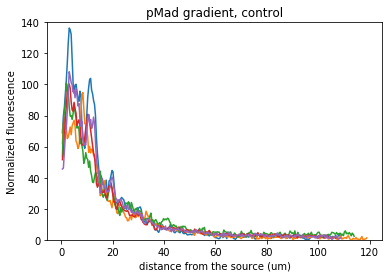

In [34]:
Control=Pmad['control'];Control=Control[Control['X']>0]
Ratio_Control=[]
L_Half_Control=[]
for col in Control.columns[1:]: 
    plt.plot(Control['X'],Control[col])
    plt.ylim([0, 140])
    plt.xlabel('distance from the source (um)')
    plt.ylabel('Normalized fluorescence')
    plt.title('pMad gradient, control')
    # extract maximum value of the profile
    M=Control[col].max()
    # extract the position of the maximum value of the profile
    XM=Control[Control[col]==M].X.values[0]-XM
    Xhalf= Control[(Control[col]<M/2.0) & (Control['X']>XM)].X.values[0]
    Plat=Control[(Control.X>60)&(Control.X<80)][col].mean()
    Ratio_Control.append(Plat/M)
    L_Half_Control.append(Xhalf)

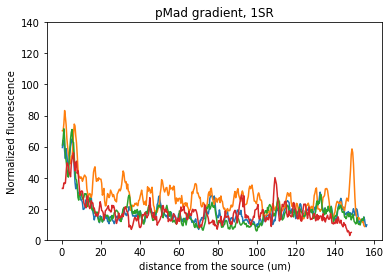

In [35]:
oneX=Pmad['1xreceptor'];oneX=oneX[oneX['X']>0]
Ratio_oneX=[]
L_Half_oneX=[]
for col in oneX.columns[1:]: 
    plt.plot(oneX['X'],oneX[col])
    plt.ylim([0, 140])
    plt.xlabel('distance from the source (um)')
    plt.ylabel('Normalized fluorescence')
    plt.title('pMad gradient, 1SR')
    # extract maximum value of the profile
    M=oneX[col].max()
    # extract the position of the maximum value of the profile
    XM=oneX[oneX[col]==M].X.values[0]
    Xhalf= oneX[(oneX[col]<M/2.0) & (oneX['X']>XM)].X.values[0]
    Plat=oneX[(oneX.X>60)&(oneX.X<80)][col].mean()
    Ratio_oneX.append(Plat/M)
    L_Half_oneX.append(Xhalf)

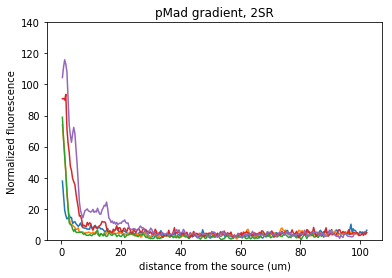

In [36]:
twoX=Pmad['2x receptor'];twoX=twoX[twoX['X']>0]
Ratio_twoX=[]
L_Half_twoX=[]
for col in twoX.columns[1:]: 
    plt.plot(twoX['X'],twoX[col])
    plt.ylim([0, 140])
    plt.xlabel('distance from the source (um)')
    plt.ylabel('Normalized fluorescence')
    plt.title('pMad gradient, 2SR')
    # extract maximum value of the profile
    M=twoX[col].max()
    # extract the position of the maximum value of the profile
    XM=twoX[twoX[col]==M].X.values[0]
    Xhalf= twoX[(twoX[col]<M/2.0) & (twoX['X']>XM)].X.values[0]
    Plat=twoX[(twoX.X>60)&(twoX.X<80)][col].mean()
    Ratio_twoX.append(Plat/M)
    L_Half_twoX.append(Xhalf)

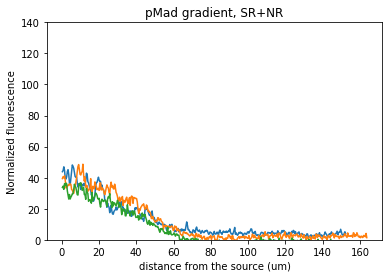

In [37]:
GPI=Pmad['Dally-LaG3-GPI'];GPI=GPI[GPI['X']>0]
Ratio_GPI=[]
L_Half_GPI=[]
for col in GPI.columns[1:]: 
    plt.plot(GPI['X'],GPI[col])
    plt.ylim([0, 140])
    plt.xlabel('distance from the source (um)')
    plt.ylabel('Normalized fluorescence')
    plt.title('pMad gradient, SR+NR')
    # extract maximum value of the profile
    M=GPI[col].max()
    # extract the position of the maximum value of the profile
    XM=GPI[GPI[col]==M].X.values[0]
    Xhalf= GPI[(GPI[col]<M/2.0) & (GPI['X']>XM)].X.values[0]
    Plat=GPI[(GPI.X>60)&(GPI.X<80)][col].mean()
    Ratio_GPI.append(Plat/M)
    L_Half_GPI.append(Xhalf)

In [39]:
print('Control :')
print('Half maximum position = ',np.mean(L_Half_Control),' microns +- ',np.std(L_Half_Control))
print('Ratio plateau/max = ',np.mean(Ratio_Control),' +- ',np.std(Ratio_Control))

print('1SR :')
print('Half maximum position = ',np.mean(L_Half_oneX),' microns +- ',np.std(L_Half_oneX))
print('Ratio plateau/max = ',np.mean(Ratio_oneX),' +- ',np.std(Ratio_oneX))

print('2SR:')
print('Half maximum position = ',np.mean(L_Half_twoX),' microns +- ',np.std(L_Half_twoX))
print('Ratio plateau/max = ',np.mean(Ratio_twoX),' +- ',np.std(Ratio_twoX))

print('SR+NR:')
print('Half maximum position = ',np.mean(L_Half_GPI),' microns +- ',np.std(L_Half_GPI))
print('Ratio plateau/max = ',np.mean(Ratio_GPI),' +- ',np.std(Ratio_GPI))

Control :
('Half maximum position = ', 8.9394, ' microns +- ', 4.860286024505142)
('Ratio plateau/max = ', 0.02666041666344183, ' +- ', 0.008016059231706832)
1SR :
('Half maximum position = ', 8.99625, ' microns +- ', 1.1789854483834816)
('Ratio plateau/max = ', 0.2517169945936289, ' +- ', 0.04319088915712405)
2SR:
('Half maximum position = ', 2.803, ' microns +- ', 1.4091658525524948)
('Ratio plateau/max = ', 0.04781169957428986, ' +- ', 0.021088462842515053)
SR+NR:
('Half maximum position = ', 29.672, ' microns +- ', 4.118518261057813)
('Ratio plateau/max = ', 0.06390485678631384, ' +- ', 0.050237489994906806)
